# 🍽️ Day 6 Challenge: “Data on the Table” – Crunching Cuisines and Customer Choices

Dataset: "https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants"

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("zomato.csv",on_bad_lines = 'skip', encoding = 'utf-8')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [23]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Pandas

# Q1: Nested Column Cleaning
The rate column often contains values like '4.1/5' or 'NEW' or '-'. Clean this column to keep only float ratings. How many entries are missing or invalid after cleaning?

In [28]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [32]:
print(df['rate'].unique())

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [36]:
df['rate_cleaned'] = df['rate'].astype(str).str.replace("/5","").str.strip()
df['rate_cleaned'] = pd.to_numeric(df['rate_cleaned'], errors = 'coerce')

In [46]:
missing_count = df['rate_cleaned'].isna().sum()
print("✅ Cleaned ratings:")
print(df['rate_cleaned'].head())
print(f"\n❓ Missing or invalid entries after cleaning: {missing_count}")

✅ Cleaned ratings:
0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate_cleaned, dtype: float64

❓ Missing or invalid entries after cleaning: 10052


# Q2: Restaurant Diversity Index
Calculate a cuisine diversity index for each restaurant = number of distinct cuisines they offer. Which restaurants are the most diverse?

In [57]:
df['cuisines'].isna().sum()

45

In [59]:
df['cuisines'] = df['cuisines'].fillna("")
df['cuisine_diversity'] = df['cuisines'].apply(lambda x: len(set(i.strip() for i in x.split(','))) if x else 0)

In [79]:
top_diverse = df[['name','cuisine_diversity']].sort_values(by = 'cuisine_diversity', ascending = False)
top_diverse

,name,cuisine_diversity
5118,FreshMenu,8
30728,Eat up's Cloud Kitchen,8
1578,Healthy Smoothie,8
41641,The Restaurant,8
17128,Cloud Foods,8
...,...,...
29298,AB's - Absolute Barbecues,0
759,The House Of Vadapav,0
4037,Chai Point,0
32131,AB's - Absolute Barbecues,0


In [81]:
print("🏆 Top 10 Most Diverse Restaurants:")
print(top_diverse.head(10))

🏆 Top 10 Most Diverse Restaurants:
                                             name  cuisine_diversity
5118                                    FreshMenu                  8
30728                      Eat up's Cloud Kitchen                  8
1578                             Healthy Smoothie                  8
41641                              The Restaurant                  8
17128                                 Cloud Foods                  8
18721                                   Food Coma                  8
7900      Bloomsbury's Global Kitchen & Bakehouse                  8
16838  Tangerine - Davanam Sarovar Portico Suites                  8
955                                     FreshMenu                  8
4248                                Delight Foods                  8


# Q3: Votes Normalization by Location
Calculate the average number of votes per restaurant in each location. Then normalize each restaurant's votes by its location average (i.e., votes/avg_votes_in_location).

In [108]:
avg_votes_location_rest = df.groupby(['location', 'name'])['votes'].mean().reset_index()
avg_votes_location_rest.rename(columns = {'votes': 'avg_votes_loc_rest'},inplace = True)
avg_votes_location_rest

,location,name,avg_votes_loc_rest
0,BTM,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,41.000000
1,BTM,2nd Home Restaurant,21.000000
2,BTM,36th Cross Coffee Mane,29.000000
3,BTM,"3B's - Buddies, Bar & Barbecues",1161.285714
4,BTM,A2B - Adyar Ananda Bhavan,167.800000
...,...,...,...
12135,Yeshwantpur,The Cupcake Story,13.000000
12136,Yeshwantpur,The Duke Of Juices,8.000000
12137,Yeshwantpur,Tuckinto,30.000000
12138,Yeshwantpur,Udupi Garden,44.000000


In [110]:
df = df.merge(avg_votes_location_rest, on = ['location', 'name'],how = 'left')


In [116]:
df['normalized_votes_rest'] = df['votes']/df['avg_votes_loc_rest']

In [118]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_cleaned,cuisine_diversity,avg_votes_loc_rest,normalized_votes_rest
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,3,780.888889,0.992459
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,...,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,3,787.000000,1.000000
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,"Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,3,918.545455,0.999406
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,...,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,2,88.000000,1.000000
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,2,166.000000,1.000000


# Visualization

# Q1: Heatmap of Votes vs Cost by Rating Brackets
Create rating bins (e.g., 2–2.5, 2.5–3.0, etc.) and use a heatmap to analyze the average votes and cost for each bracket.

In [126]:
bins = [0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['<2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0']
df['rating_bin'] = pd.cut(df['rate_cleaned'], bins = bins, labels = labels)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_cleaned,cuisine_diversity,avg_votes_loc_rest,normalized_votes_rest,rating_bin
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,3,780.888889,0.992459,4.0-4.5
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,...,800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,3,787.000000,1.000000,4.0-4.5
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,3,918.545455,0.999406,3.5-4.0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,...,300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,2,88.000000,1.000000,3.5-4.0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,2,166.000000,1.000000,3.5-4.0


In [124]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [128]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(",","")
df['cost_cleaned'] = pd.to_numeric(df['approx_cost(for two people)'], errors = 'coerce')

In [130]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,reviews_list,menu_item,listed_in(type),listed_in(city),rate_cleaned,cuisine_diversity,avg_votes_loc_rest,normalized_votes_rest,rating_bin,cost_cleaned
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,3,780.888889,0.992459,4.0-4.5,800.0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,...,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,3,787.000000,1.000000,4.0-4.5,800.0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,3,918.545455,0.999406,3.5-4.0,800.0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,...,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,2,88.000000,1.000000,3.5-4.0,300.0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,2,166.000000,1.000000,3.5-4.0,600.0


In [144]:
heatmap_data = df.groupby('rating_bin',observed=True)[['votes', 'cost_cleaned']].mean().round(1)
heatmap_data

,votes,cost_cleaned
rating_bin,,
<2.0,325.9,1318.8
2.0-2.5,187.7,610.1
2.5-3.0,91.3,500.5
3.0-3.5,42.3,403.8
3.5-4.0,193.0,555.4
4.0-4.5,964.8,948.0
4.5-5.0,3446.0,1257.3


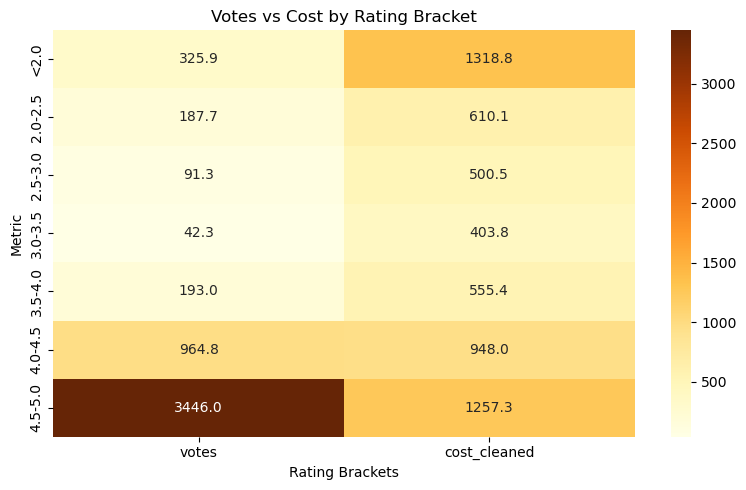

In [150]:
plt.figure(figsize = (8,5))
sns.heatmap(heatmap_data, annot = True, cmap='YlOrBr', fmt='.1f')
plt.title("Votes vs Cost by Rating Bracket")
plt.xlabel("Rating Brackets")
plt.ylabel("Metric")
plt.tight_layout()
plt.show() 

# Q2: Top Rated Cuisines (with Filtering)
For cuisines with at least 50 restaurants, visualize the top 10 with the highest average rating.

In [167]:
df1 = df.copy()
df1['cuisines'] = df1['cuisines'].fillna('')
df1['cuisines'] = df1['cuisines'].apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])
df1 = df1.explode('cuisines')

In [175]:
df1 = df1[df1['rate_cleaned'].notnull()]

In [191]:
cuisine_stats = df1.groupby('cuisines').agg(rest_count = ('cuisines','count'),avg_rating = ('rate_cleaned','mean'))
cuisine_stats

,rest_count,avg_rating
cuisines,,
Afghan,59,3.942373
Afghani,8,3.837500
African,17,4.523529
American,1336,4.070659
Andhra,1481,3.600878
...,...,...
Tibetan,300,3.715667
Turkish,85,4.016471
Vegan,6,4.300000


In [195]:
popular_cuisine = cuisine_stats[cuisine_stats['rest_count'] >= 50]
popular_cuisine

,rest_count,avg_rating
cuisines,,
Afghan,59,3.942373
American,1336,4.070659
Andhra,1481,3.600878
Arabian,927,3.610895
Asian,1204,4.135631
...,...,...
Thai,952,3.987290
Tibetan,300,3.715667
Turkish,85,4.016471


In [197]:
top_rated = popular_cuisine.sort_values(by = 'avg_rating', ascending = False).head(10)
top_rated

,rest_count,avg_rating
cuisines,,
Modern Indian,145,4.308276
Malaysian,109,4.306422
Japanese,340,4.258235
Mediterranean,546,4.213187
Konkan,81,4.170370
European,687,4.165793
Korean,141,4.149645
Asian,1204,4.135631
Burmese,55,4.107273


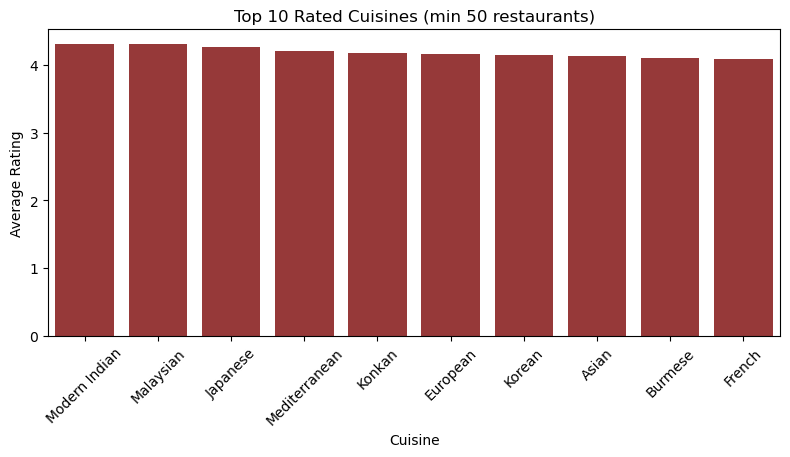

In [211]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top_rated, y='avg_rating', x='cuisines', color = 'brown')
plt.title('Top 10 Rated Cuisines (min 50 restaurants)')
plt.ylabel('Average Rating')
plt.xlabel('Cuisine')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Q3: Distribution Plot of Normalized Ratings
After cleaning, plot the distribution of the ratings using sns.kdeplot(). Is the rating distribution skewed?



In [216]:
df['normalized_rating'] = df['rate_cleaned'] / df['rate_cleaned'].max()

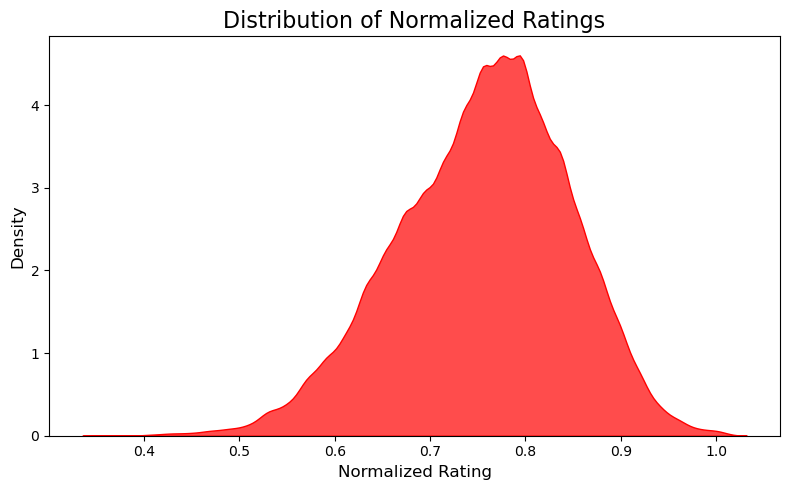

In [226]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['normalized_rating'], fill=True, color='red', alpha=0.7)
plt.title('Distribution of Normalized Ratings', fontsize=16)
plt.xlabel('Normalized Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()


# EDA

# Q1: Location Saturation Score
Create a metric for each location: total restaurants * average rating. Which locations are “saturated” with highly rated places?

In [236]:
df_location_rating = df[['location', 'rate_cleaned']].dropna()

location_stats = df_location_rating.groupby('location').agg(rest_count = ('rate_cleaned', 'count'), avg_rating = ('rate_cleaned', 'mean')).reset_index()

location_stats['saturation_score'] = location_stats['rest_count'] * location_stats['avg_rating']

top_saturated_locations = location_stats.sort_values(by = 'saturation_score', ascending = False)
top_saturated_locations

,location,rest_count,avg_rating,saturation_score
0,BTM,3930,3.573740,14044.8
44,Koramangala 5th Block,2319,4.005821,9289.5
22,HSR,2019,3.672164,7414.1
27,Indiranagar,1847,3.828154,7070.6
29,JP Nagar,1717,3.675306,6310.5
...,...,...,...,...
90,Yelahanka,5,3.640000,18.2
87,West Bangalore,3,3.366667,10.1
67,Rajarajeshwari Nagar,2,3.850000,7.7
57,Nagarbhavi,1,3.400000,3.4


# Q2: Chain Detection
Identify restaurant names that appear in multiple locations. Which chain has the highest total number of votes?

In [245]:
chain_counts = df.groupby('name')['location'].nunique().reset_index()
chain_counts.rename(columns = {'location': 'location_count'}, inplace = True)
chain_counts

,name,location_count
0,#FeelTheROLL,1
1,#L-81 Cafe,1
2,#Vibes Restro,1
3,#refuel,1
4,'Brahmins' Thatte Idli,1
...,...,...
8787,late100,1
8788,nu.tree,3
8789,re:cess - Hilton Bangalore Embassy GolfLinks,1
8790,repEAT Hub,1


In [249]:
chains = chain_counts[chain_counts['location_count'] > 1]
chains

,name,location_count
12,1522 - The Pub,3
16,1947,4
28,24 Hours Cake Delivery,2
40,36th Cross Coffee Mane,2
43,"3B's - Buddies, Bar & Barbecues",2
...,...,...
8755,Zee5 Loft,2
8757,Zeeshan,5
8775,Zu's Doner Kebaps,2
8782,eat.fit,9


In [257]:
chain_votes = df.groupby('name')['votes'].sum().reset_index(name = 'total_votes')
chain_votes

,name,total_votes
0,#FeelTheROLL,14
1,#L-81 Cafe,432
2,#Vibes Restro,0
3,#refuel,111
4,'Brahmins' Thatte Idli,0
...,...,...
8787,late100,0
8788,nu.tree,1443
8789,re:cess - Hilton Bangalore Embassy GolfLinks,438
8790,repEAT Hub,0


In [261]:
chain_summary = pd.merge(chains, chain_votes, on = 'name')
chain_summary

,name,location_count,total_votes
0,1522 - The Pub,3,41172
1,1947,4,20590
2,24 Hours Cake Delivery,2,16
3,36th Cross Coffee Mane,2,118
4,"3B's - Buddies, Bar & Barbecues",2,21990
...,...,...,...
1206,Zee5 Loft,2,8962
1207,Zeeshan,5,4755
1208,Zu's Doner Kebaps,2,143
1209,eat.fit,9,30414


In [273]:
top_chain = chain_summary.sort_values(by = 'total_votes', ascending = False).head(1)
top_chain

,name,location_count,total_votes
815,Onesta,13,347520


# Statistics 

# Q1: T-Test: Book Table vs No Book Table Ratings
Is there a significant difference in average ratings between restaurants that offer table booking and those that don’t?

In [291]:
from scipy import stats

df_ttest = df[df['book_table'].isin(['Yes', 'No'])].copy()
df_ttest = df_ttest.dropna(subset = ['rate_cleaned'])

book_yes = df_ttest[df_ttest['book_table'] == 'Yes']['rate_cleaned']
book_no = df_ttest[df_ttest['book_table'] == 'No']['rate_cleaned']

t_stat, p_val = stats.ttest_ind(book_yes, book_no)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("There is a **significant difference** in ratings between restaurants that offer table booking and those that don't.")
else:
    print("There is **no significant difference** in ratings between the two groups.")


T-statistic: 95.733
P-value: 0.00000
There is a **significant difference** in ratings between restaurants that offer table booking and those that don't.
